# Librerías

In [299]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Datos

In [300]:
def limpiar_valor(valor):
    valor = valor.strip()
    partes = valor.split('.')
    
    if len(partes) <= 2:
        # Tiene uno o ningún punto → está bien
        return valor
    else:
        # Más de un punto → unimos todo menos el último con '' y dejamos el último como decimal
        entero = ''.join(partes[:-1])
        decimal = partes[-1]
        return f"{entero}.{decimal}"

def datos(csv_file_path):
    tabla = []
    with open(csv_file_path, newline='', encoding='utf-8') as archivo:
        lector = csv.reader(archivo, delimiter=';')
        for fila in lector:
            fila_limpia = []
            for celda in fila:
                valor = limpiar_valor(celda)
                try:
                    fila_limpia.append(float(valor))
                except ValueError:
                    fila_limpia.append(valor.strip())  # No es número, mantenemos como texto
            tabla.append(fila_limpia)
    return tabla

# Muestra con EDTA

In [301]:
em_m_edta = datos('Emision muestra con EDTA.csv')

em_p_edta = datos('Emision positivo con EDTA.csv')

em_n_edta = datos('Emision negativo con EDTA_Ext500.csv')

ex_m_edta = datos('Exitacion muestra con EDTA_em510.csv')

ex_p_edta = datos('Exitacion positivo con EDTA_em510.csv')

# Muestra sin EDTA

In [302]:
em_m = datos('Emision muestra sin EDTA.csv')

em_p = datos('Emision Positivo sin EDTA.csv')

em_n = datos('Emision Negativo sin EDTA.csv')

# Datos

In [303]:
def longitud_onda(dato):
    return [row[1] for row in dato]

In [304]:
def intensidad_fluorescencia(dato):
    return [float(row[2]) for row in dato]

# Gráficas 

Sin EDTA

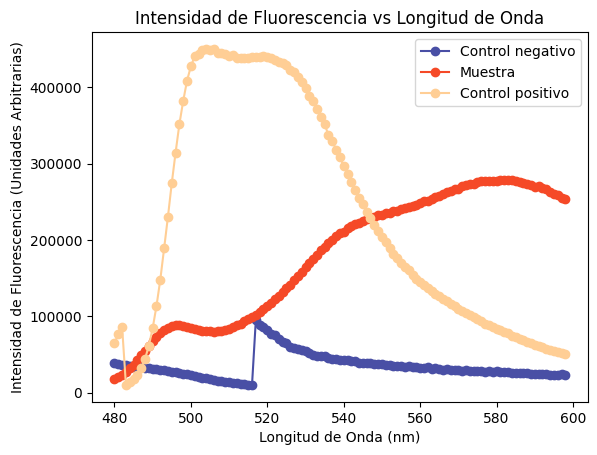

In [305]:
#Emisión sin EDTA

for i in range(120, 160):
    em_n[i][1] = em_n[i][1] / 10


plt.plot(longitud_onda(em_n[:119]), intensidad_fluorescencia(em_n[:119]), marker='o', color="#494FA5", label='Control negativo')

plt.plot(longitud_onda(em_m[:119]), intensidad_fluorescencia(em_m[:119]), marker='o', linestyle='-', color='#F54927', label = 'Muestra')
plt.plot(longitud_onda(em_p[:119]), intensidad_fluorescencia(em_p[:119]), marker='o', color="#FFCE95", label='Control positivo')
plt.title('Intensidad de Fluorescencia vs Longitud de Onda')
plt.xlabel('Longitud de Onda (nm)') 
plt.ylabel('Intensidad de Fluorescencia (Unidades Arbitrarias)')
#plt.grid()
plt.legend()
plt.show()

Con EDTA

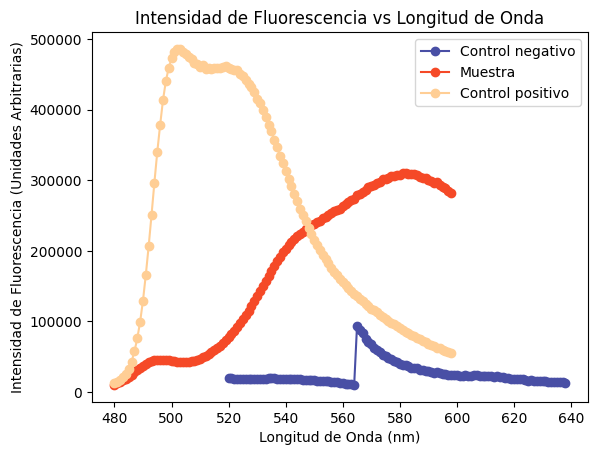

In [306]:
# Emisión con EDTA

plt.plot(longitud_onda(em_n_edta[:119]), intensidad_fluorescencia(em_n_edta[:119]), marker='o', color="#494FA5", label='Control negativo')

plt.plot(longitud_onda(em_m_edta[:119]), intensidad_fluorescencia(em_m_edta[:119]), marker='o', linestyle='-', color='#F54927', label = 'Muestra')
plt.plot(longitud_onda(em_p_edta[:119]), intensidad_fluorescencia(em_p_edta[:119]), marker='o', color="#FFCE95", label='Control positivo')
plt.title('Intensidad de Fluorescencia vs Longitud de Onda')
plt.xlabel('Longitud de Onda (nm)') 
plt.ylabel('Intensidad de Fluorescencia (Unidades Arbitrarias)')
#plt.grid()
plt.legend()
plt.show()

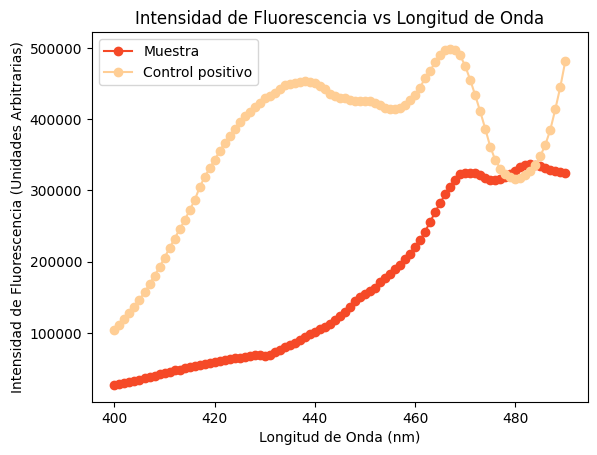

In [307]:
# Excitación con EDTA

plt.plot(longitud_onda(ex_m_edta[:119]), intensidad_fluorescencia(ex_m_edta[:119]), marker='o', linestyle='-', color='#F54927', label = 'Muestra')
plt.plot(longitud_onda(ex_p_edta[:119]), intensidad_fluorescencia(ex_p_edta[:119]), marker='o', color="#FFCE95", label='Control positivo')
plt.title('Intensidad de Fluorescencia vs Longitud de Onda')
plt.xlabel('Longitud de Onda (nm)') 
plt.ylabel('Intensidad de Fluorescencia (Unidades Arbitrarias)')
#plt.grid()
plt.legend()
plt.show()